In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
# import quad from scipy
from scipy.integrate import quad

In [38]:
x_0 = 1
b = 0.01
sigma = 0.5

# IFT in  Practice: 1D case

### Given $$ Q(x) = \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} - bx^{4}\biggr] $$ $$P(x) = \frac{Q(x)}{Z} = \frac{e^{-H(x)}}{\int_{-\infty}^{\infty}e^{-H(x)}dx}$$

## Finding the Hamiltonian 

### We have that the Hamiltonian is given by: $$H(x) = -\log(Q(x)) = \frac{(x - x_{0})^{2}}{2\sigma^{2}} + bx^{4} = \frac{x^2 - 2xx_{0} + x_{0}^{2}}{2\sigma^{2}} + bx^{4}$$

### Taking the Taylor Expansion of the Hamiltonian is: $$H(x) = H(0) + H'(0) + H''(0) + \sum_{n=3}^{\infty} \frac{1}{n!}H^{(n)}(0)$$

### Where $$H(0) = \frac{x_{0}^{2}}{2\sigma^{2}}$$ $$H'(0) = -\frac{x_{0}}{\sigma^{2}}$$ $$H''(0) = \frac{1}{\sigma^{2}}$$ $$H^{(4)}(0) = 4!b$$ $$H^{(n) \geq 5} = H^{(n) = 3} = 0$$

### So we get $$H(x) = \frac{x_{0}^{2}}{2\sigma^{2}} -\frac{x_{0}}{\sigma^{2}}x + \frac{1}{\sigma^{2}}\frac{x^{2}}{2!} + bx^{4}$$

In [39]:
def Hamiltonian(x0: float, x:float, sigma: float, b: float) -> float:
    H0 = 0.5 * x0**2
    H_p1 =  ((x0**2) * x) / (2 * sigma**2)
    H_p2 = x / (2 * sigma**2) 
    H_p4 = b * (x**4)

    return H0 + H_p1 + H_p2 + H_p4

## Finding the Partion Function $Z$

$$a = \frac{1}{2\sigma^{2}}$$
$$a^{-1} = 2\sigma^{2}$$

Given 
$$
\int_{-\infty}^{\infty}x^{n}e^{-ax^2}dx = \frac{(n-1)(n-3)\dots 3 \cdot 1}{2^{\frac{n}{2}+1}a^{\frac{n}{2}}}\sqrt{\frac{\pi}{a}}
$$
For $m = 4n$
$$
\frac{(4n-1)(4n-3)\dots 3 \cdot 1}{2^{2n+1}a^{2n}}\sqrt{\frac{\pi}{a}}
$$ 
for $n = 2 \mod 0$
\begin{align*}
Z &= \int_{-\infty}^{\infty}e^{-H(x)}dx \\
&= \int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} - bx^{4}\biggr] dx \\
&= \int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]\exp[- bx^{4}] dx \\
&= \int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]\sum_{n=0}^{\infty} \frac{(-bx^{4})^{n}}{n!} \\
&= \int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]\biggl(1 - bx^{4} + \frac{b^{2}x^{8}}{2} - \dots \biggr) \\ 
&= \int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]dx - b\int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]x^{4} dx + \frac{b^{2}}{2}\int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]x^{8}dx - \cdots\\
&= \sum_{n=0}^{\infty} \frac{(-1)^{n}b^{n}}{n!}\int_{-\infty}^{\infty} \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} \biggr]x^{4n}dx \\
&= \sum_{n=0}^{\infty} \frac{(-1)^{n}b^{n}}{n!}\frac{(4n-1)(4n-3)\dots 3 \cdot 1}{2^{2n+1}(\frac{1}{2\sigma^{2}})^{2n}}\sqrt{\frac{\pi}{\frac{1}{2\sigma^{2}}}} \\
&= \sum_{n=0}^{\infty} \frac{(-1)^{n}b^{n}}{n!}\frac{(4n-1)(4n-3)\dots 3 \cdot 1}{2(\frac{1}{\sigma^{4n}})}\sqrt{2\pi\sigma^{2}} \\
&= \sum_{n=0}^{\infty} \frac{(-1)^{n}b^{n}}{n!}\frac{(4n-1)(4n-3)\dots 3 \cdot 1}{2}\sigma^{4n}\sqrt{2\pi\sigma^{2}} \\
&= \frac{\sqrt{2\pi\sigma^{2}}}{2}\sum_{n=0}^{\infty} \frac{(-1)^{n}b^{n}}{n!}((4n-1)(4n-3)\dots 3 \cdot 1)\sigma^{4n}
\end{align*}



In [40]:
def Za(sigma: float, N: int, b: float) -> float:
    const = math.sqrt(2 * math.pi * (sigma**2)) 
    const /= 2
    result = 0
    for n in range(N+1):
        sign = (-1)**n
        b_n = b**(n)
        n_fact = math.factorial(n)
        n_fact = 1 / n_fact
        sigma_n = sigma**(4*n)
        fact_4n = math.prod(4*n - k for k in range(1, n+1, 2))
        result += sign * b_n * n_fact * sigma_n * fact_4n

    return result * const

def Zift(sigma: float, N: int, b: float) -> float:
    pass



In [41]:
Z = Za(sigma, 200, b)
print(Z)

0.625482940888127


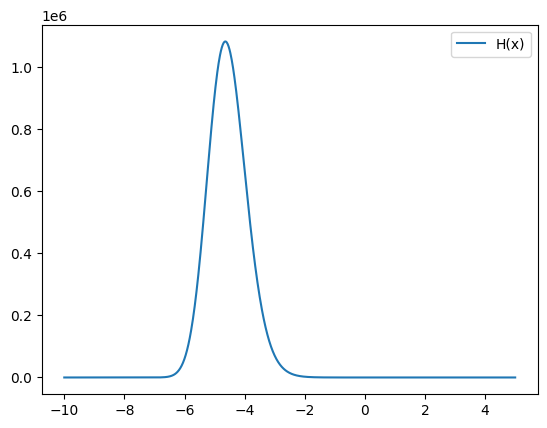

In [43]:
x = np.linspace(-10, 5, 1000)
Q = [np.exp(-Hamiltonian(x_0, xi, sigma, b)) for xi in x]
P = [q / Z for q in Q]
plt.plot(x, P, label='H(x)')
plt.legend()
plt.show()